# Titanic - Machine Learning from Disaster
Kaggle: https://www.kaggle.com/competitions/titanic

Guide: https://hackmd.io/@Go3PyC86QhypSl7kh5nA2Q/Hk4nXFYkK

# Note for ML
1. Observe the data. Charts are a good tool for observing the data.
2. Do feature engineering. Feature engineering involves preparing data for machine learning models through processes such as data cleaning, encoding categorical variables into numerical formats, and standardizing numerical data.
3.  Create model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

TrainData = pd.read_csv('input/train.csv')
# TrainData = pd.read_csv('/kaggle/input/train.csv')

# Observe the data
資料，包含乘客的艙等(pClass)、性別(Sex)、年齡(Age)、兄弟姊妹＋老婆丈夫數量(SibSp)、父母小孩的數量(Parch)、票號(Ticket)、票的費用(Fare)、房間號碼(Cabin)、出發港口(Embarked)等

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.4

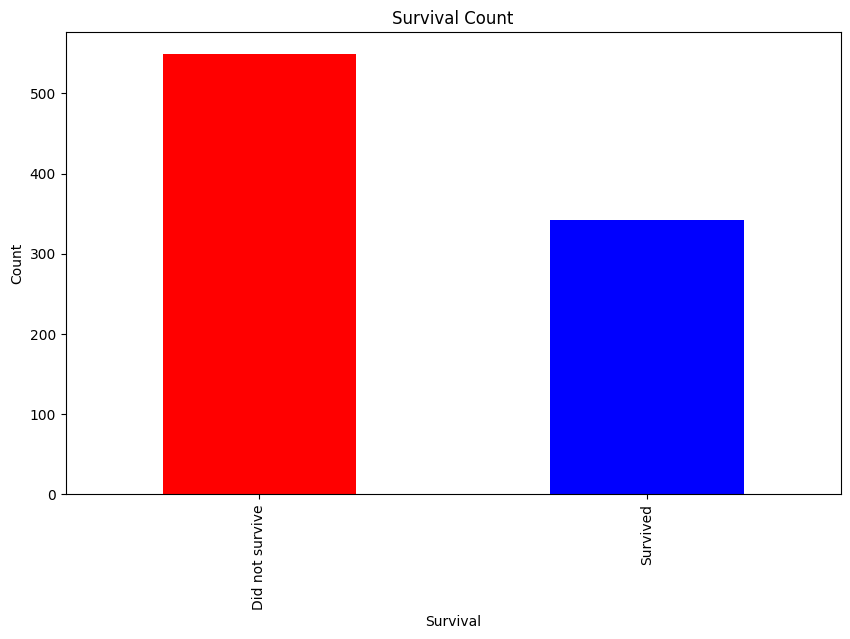

<Figure size 1000x600 with 0 Axes>

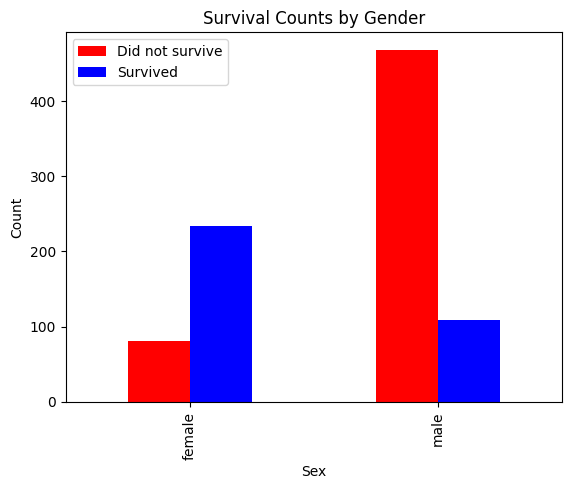

<Figure size 1000x600 with 0 Axes>

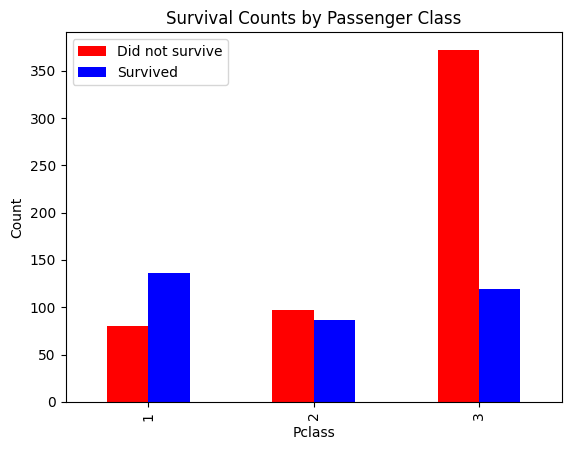

C:\Users\alanc\AppData\Local\Temp\ipykernel_6656\4168910571.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = TrainData.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

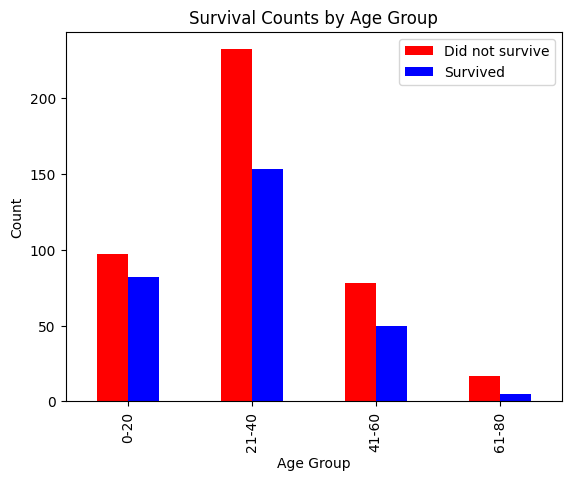

<Figure size 1000x600 with 0 Axes>

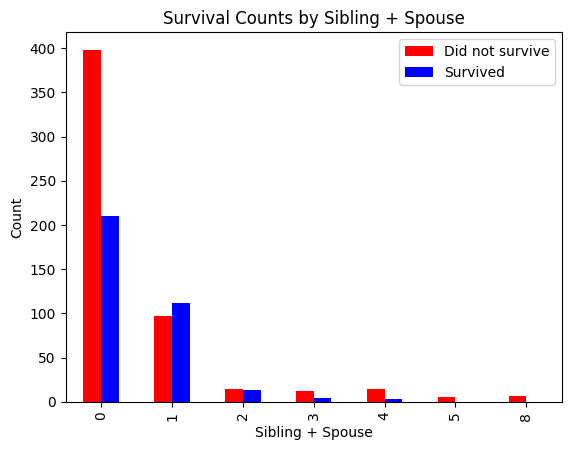

<Figure size 1000x600 with 0 Axes>

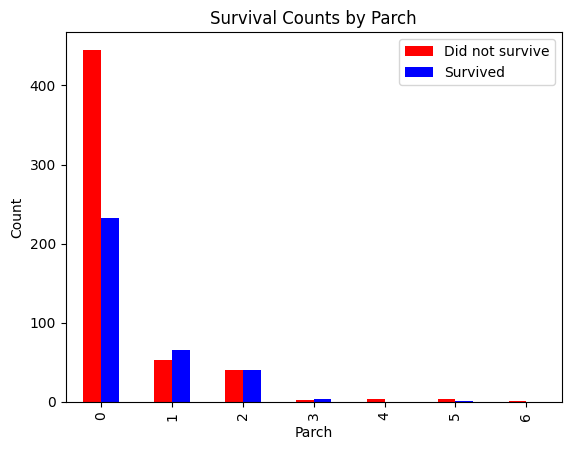

C:\Users\alanc\AppData\Local\Temp\ipykernel_6656\4168910571.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_counts = TrainData.groupby(['FareGroup', 'Survived']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

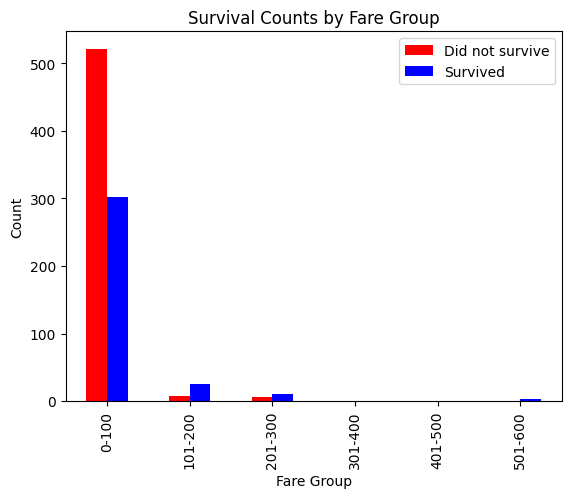

<Figure size 1000x600 with 0 Axes>

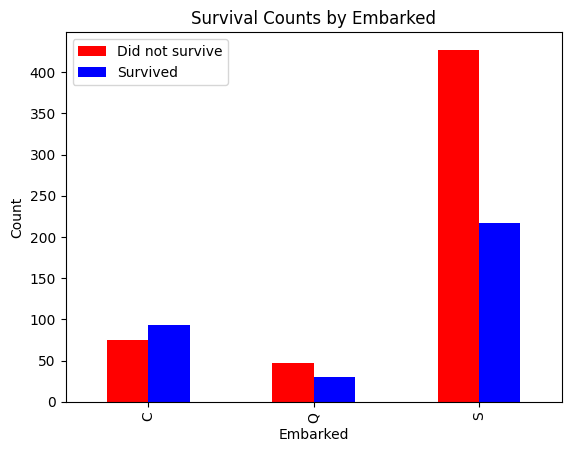

In [2]:
print(TrainData.columns)
print(TrainData.describe())

# 1st Graph: Overall survival count
value_counts = TrainData['Survived'].value_counts()
plt.figure(figsize=(10,6))
value_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count')
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'])
plt.show()

# 2nd Graph: Survival counts by gender
survival_counts_gender = TrainData.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_gender.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Counts by Gender')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 3rd Graph: Survival counts by passenger class
survival_counts_class = TrainData.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_class.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Counts by Passenger Class')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 4th Graph: Survival counts by age group
# Define age bins and labels
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '21-40', '41-60', '61-80']
TrainData['AgeGroup'] = pd.cut(TrainData['Age'], bins=bins, labels=labels)
age_group_counts = TrainData.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
age_group_counts.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Counts by Age Group')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 5th Graph: Survival counts by Sibling + Spouse
survival_counts_class = TrainData.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_class.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Sibling + Spouse')
plt.ylabel('Count')
plt.title('Survival Counts by Sibling + Spouse')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 6th Graph: Survival counts by Parch
survival_counts_class = TrainData.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_class.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Survival Counts by Parch')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 7th Graph: Survival counts by Fare group
# Define age bins and labels
bins = [0, 100, 200, 300, 400, 500, 600]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600']
TrainData['FareGroup'] = pd.cut(TrainData['Fare'], bins=bins, labels=labels)
fare_group_counts = TrainData.groupby(['FareGroup', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
fare_group_counts.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Fare Group')
plt.ylabel('Count')
plt.title('Survival Counts by Fare Group')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 8th Graph: Survival counts by Embarked
survival_counts_class = TrainData.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_class.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Counts by Embarked')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# remove redundant info we added just now
TrainData.drop(labels = "AgeGroup", axis=1, inplace=True) # axis=1: Indicates that you are dropping a column (0 would indicate dropping a row).
TrainData.drop(labels = "FareGroup", axis=1, inplace=True) 

### Conclusion of Observation
**Gender** can significantly influence survival; the probability of survival for **women** is higher than for men. Passenger **class** also affects the survival rate: **the higher the class**, the greater the likelihood of survival. Additionally, **fare** influences the survival rate: **the higher the fare**, the greater the probability of survival. **Age** also influence the survival rate, **the smaller the age**, the greater the likelihood of survival.

In conclusion, **gender**, **wealth**, and **age** have the most impact on survival.

# Feature Engineering
### 1. Data cleaning

In [3]:
# remove data with missing info of gender, class, and fare
old_rows, _ = TrainData.shape
print(f"The old data has {old_rows} rows")

# Remove rows with any null values
TrainData.dropna(subset=['Sex', 'Pclass', 'Fare', 'Age', 'Embarked'], inplace=True)

new_rows, _ = TrainData.shape
print(f"After deletion, the new data has {new_rows} rows")

# remove unnecessary info, like name, passengerID, ticket, and cabin
TrainData.drop(columns=['Name', 'PassengerId', 'Cabin', 'Ticket'],inplace=True)


# Count the empty values in each column
TrainData.isna().sum()

The old data has 891 rows
After deletion, the new data has 712 rows


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 2. Encoding categorical variables into numerical formats


In [4]:
# Observe the data type of each catagories
print(TrainData.dtypes)

# Sex and embarked need to be encoded. Print the unique values in the columns
print(TrainData['Sex'].unique())
print(TrainData['Embarked'].unique())

# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to 'Sex' and 'Embarked'
TrainData['Sex'] = le.fit_transform(TrainData['Sex'])
TrainData['Embarked'] = le.fit_transform(TrainData['Embarked'])

print(TrainData['Sex'].unique())
print(TrainData['Embarked'].unique())

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
['male' 'female']
['S' 'C' 'Q']
[1 0]
[2 0 1]


In [5]:
# split data into training and validation set
print(TrainData.columns)
y = TrainData.iloc[:, 0]
x = TrainData.iloc[:, 1:8]
print(y.head())
print(x.head())

# Split the dataset into 80% training and 20% validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 0) # set random state as an integer to allow reproducibility

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


### 3. Standardizing numerical data.
為甚麼要做標準化?
因為在資料中，是用不同資料欄位與資料值所組成，他們分佈狀況可能都不盡相同，因此，就必須將特徵資料按比例縮放，讓資料落在某一特定的區間。

**Make data has a mean of 0 and a standard deviation of 1**

In [6]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it. This modifies the scaler as well
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_val_scaled = scaler.transform(x_val)

# Create model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
LogReg = LogisticRegression()
# Train the model
LogReg.fit(x_train_scaled, y_train)
# Predict on validation set
y_val_pred = LogReg.predict(x_val_scaled)
# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"LogisticRegression accuracy: {accuracy:.2f}")

# Initialize model
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# Train the model
tree.fit(x_train_scaled, y_train)
# Predict on validation set
y_val_pred = tree.predict(x_val_scaled)
# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"DecisionTreeClassifier accuracy: {accuracy:.2f}")


# Initialize model
forest = RandomForestClassifier(n_estimators=100, random_state=0)
# Train the model
forest.fit(x_train_scaled, y_train)
# Predict on validation set
y_val_pred = forest.predict(x_val_scaled)
# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"RandomForestClassifier accuracy: {accuracy:.2f}")


# Initialize model
svc = SVC(kernel='linear', random_state=0)
# Train the model
svc.fit(x_train_scaled, y_train)
# Predict on validation set
y_val_pred = svc.predict(x_val_scaled)
# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"SVC accuracy: {accuracy:.2f}")


from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the model
gbm = GradientBoostingClassifier(random_state=0)
# Perform grid search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
# Train the best model
best_gbm = grid_search.best_estimator_
best_gbm.fit(x_train_scaled, y_train)
# Predict on validation set
y_val_pred = best_gbm.predict(x_val_scaled)
# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Optimized GradientBoostingClassifier accuracy: {accuracy:.2f}")


# Initialize model
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(x_train_scaled, y_train)
# Predict on validation set
y_val_pred = knn.predict(x_val_scaled)
# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"KNeighborsClassifier accuracy: {accuracy:.2f}")



LogisticRegression accuracy: 0.81
DecisionTreeClassifier accuracy: 0.78
RandomForestClassifier accuracy: 0.79
SVC accuracy: 0.79
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.82
Optimized GradientBoostingClassifier accuracy: 0.81
KNeighborsClassifier accuracy: 0.78


# Brief explanation of each model
### 1. Logistic Regression
LogisticRegression()

- Description: Logistic Regression is a linear model used for binary classification. It models the probability of the default class (usually denoted as 0 or 1) using a logistic function.

- Advantages: Simple to implement, efficient for linearly separable data, interpretable coefficients.

- Disadvantages: Assumes linear relationship between the features and the log odds of the target, may not perform well on complex, non-linear data.

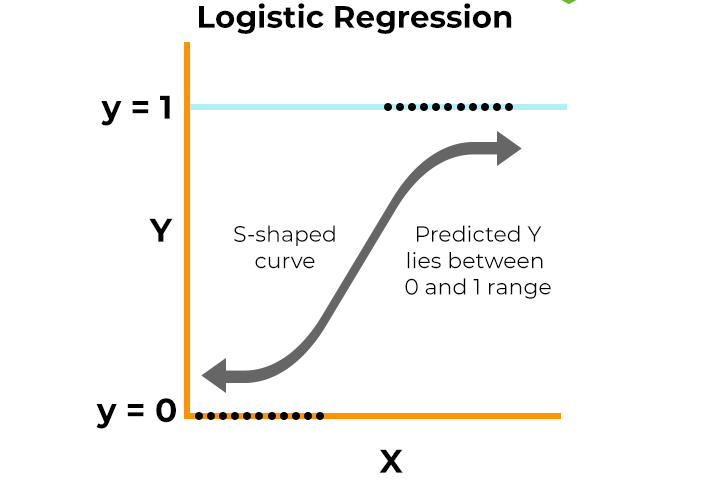

### 2. Decision Tree Classifier
DecisionTreeClassifier(criterion='entropy', random_state=0)

- Description: Decision Trees are non-linear models that partition the feature space into regions based on decision rules. Each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome.

- Advantages: Easy to understand and interpret, handles both numerical and categorical data, no need for feature scaling.

- Disadvantages: Prone to overfitting, especially with complex trees, sensitive to small changes in data.

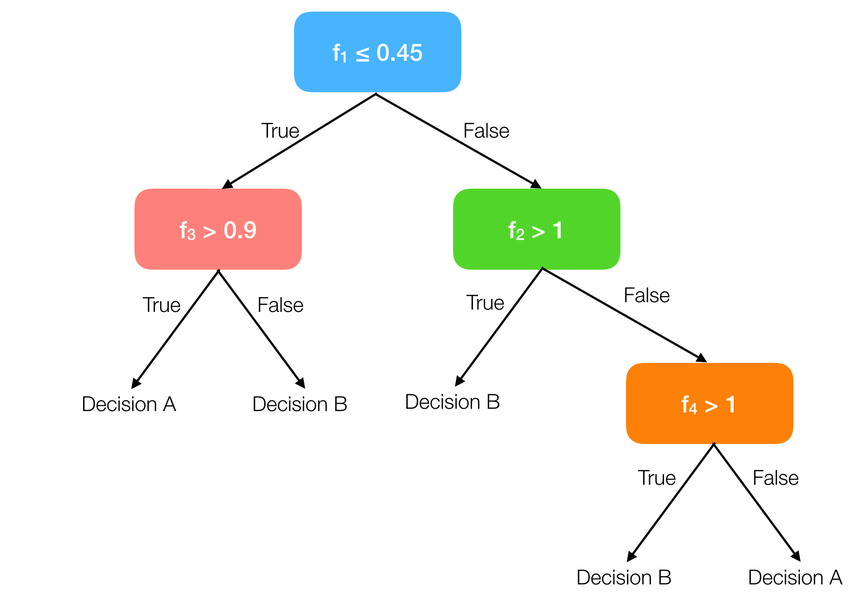

### 3. Random Forest Classifier
RandomForestClassifier(n_estimators=100, random_state=0)

- Description: Random Forest is an ensemble method that creates a collection of decision trees (a forest) and aggregates their predictions. It reduces overfitting by averaging the results.

- Advantages: Handles overfitting better than individual decision trees, robust to noise, works well with high-dimensional data.

- Disadvantages: Can be computationally intensive, less interpretable than individual decision trees.

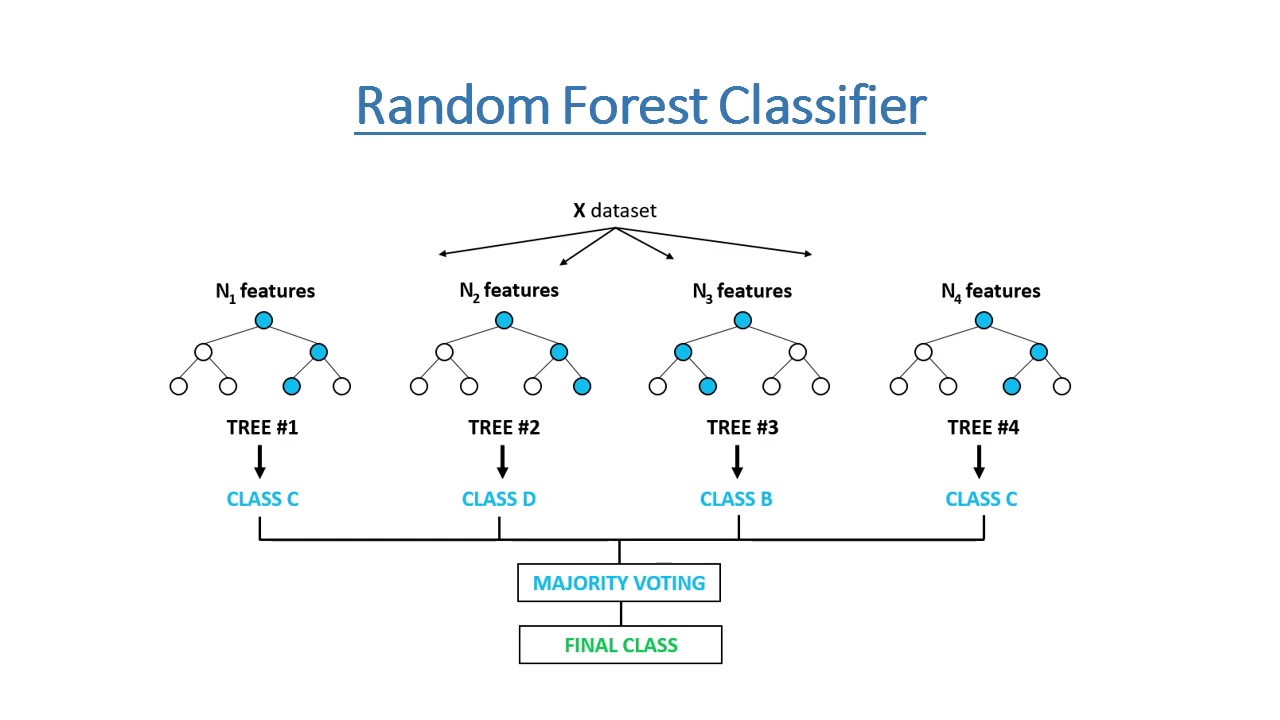

### 4. Support Vector Classifier (SVC)
SVC(kernel='linear', random_state=0)

- Description: Support Vector Machines (SVM) are powerful models for classification tasks. The linear SVC tries to find the optimal hyperplane that separates the data into classes with maximum margin.

- Advantages: Effective in high-dimensional spaces, robust to overfitting in high-dimensional space.

- Disadvantages: Can be slow to train with large datasets, less effective with noisy data.

### 5. Gradient Boosting Classifier
GradientBoostingClassifier(random_state=0)

- Description: Gradient Boosting is an ensemble method that builds trees sequentially, each tree trying to correct the errors of the previous one. It uses gradient descent to minimize the loss.

- Advantages: High performance, can handle mixed data types, flexible and robust.

- Disadvantages: Prone to overfitting if not tuned properly, can be slow to train due to sequential nature.

### 6. K-Nearest Neighbors Classifier
KNeighborsClassifier(n_neighbors=5)

- Description: K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm that assigns the class of a data point based on the majority class of its k nearest neighbors.

- Advantages: Simple to implement, non-parametric (no assumptions about data distribution), effective with well-separated data.

- Disadvantages: Computationally expensive with large datasets, sensitive to irrelevant or redundant features, requires feature scaling.


Maybe Polynomial Regression can perform very well???

# Create Output for submission

In [13]:
TestData = pd.read_csv('input/test.csv')
print(TestData.columns)

# remove unnessary info
TestData.drop(labels = "PassengerId", axis=1, inplace=True)
TestData.drop(labels = "Name", axis=1, inplace=True)
TestData.drop(labels = "Ticket", axis=1, inplace=True)
TestData.drop(labels = "Cabin", axis=1, inplace=True)
print(TestData.columns)

# Apply LabelEncoder to 'Sex' and 'Embarked'
TestData['Sex'] = le.fit_transform(TestData['Sex'])
TestData['Embarked'] = le.fit_transform(TestData['Embarked'])
print(" ")
print(TestData.head)

print(TestData.isna().sum())
# Replace NaN values in 'Age' column with the median
median_age = TrainData['Age'].median()
TestData['Age'].fillna(median_age, inplace=True)
# Replace NaN values in 'Fare' column with the median
median_fare = TrainData['Fare'].median()
TestData['Fare'].fillna(median_fare, inplace=True)
print(TestData.isna().sum())

TestData_scaled = scaler.transform(TestData) 

# Predict on validation set (!!!!!!!!!!!!!!!!!!! change trained model here!!!!!!!!!!!!!!!!!!!)
y_val_pred = best_gbm.predict(TestData_scaled)



# Save to csv
passenger_ids = range(892, 1310)  
# Create a DataFrame with PassengerId and predictions
results_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_val_pred  # Replace with your predicted values
})

# Save DataFrame to CSV file (!!!!!!!!!!!!!!!!!!! change output filename here!!!!!!!!!!!!!!!!!!!)
results_df.to_csv('output/best_gbm.csv', index=False)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
 
<bound method NDFrame.head of      Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    1   NaN      0      0    8.0500         2
414       1    0  39.0      0      0  108.9000         0
415       3    1  38.5      0      0    7.2500         2
416       3    1   NaN      0      0    8.0500         2
417       3    1   NaN      1      1   22.3583         0

[418 rows x 7 columns]>
Pclass       0
Sex          0
Ag

C:\Users\alanc\AppData\Local\Temp\ipykernel_6656\3967801271.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TestData['Age'].fillna(median_age, inplace=True)
C:\Users\alanc\AppData\Local\Temp\ipykernel_6656\3967801271.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# Check the importance of every feature, check if it meets our expectations

<Axes: xlabel='feature'>

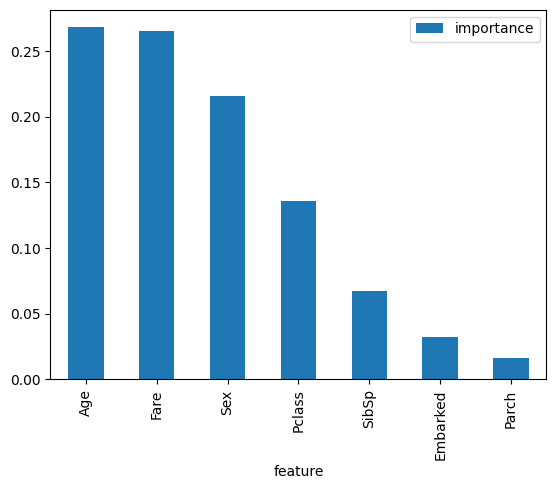

In [ ]:
import numpy as np
# Get feature impornt 
decisionTree = tree
importances = pd.DataFrame({'feature':TrainData.iloc[:, 1:8].columns, 'importance': np.round(decisionTree.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

# visualize the importance
importances.plot.bar()